In [168]:
import pandas as pd
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
clean_data = pd.read_csv('project-data/clean_cahoots_envs_data.csv')

clean_data.head()

,Date,IncidentCategory,tempmin,tempmax,precip,snow,conditions,AQI,AQI_Category,daily calls,extreme heat,extreme cold,snow event,ice event,AQI hazard
0,2016-01-01,Medical Assistance,26.1,40.0,0.0,0.0,Clear,108,Unhealthy for Sensitive Groups,641,0,1,0,0,0
1,2016-01-01,Medical Assistance,26.1,40.0,0.0,0.0,Clear,108,Unhealthy for Sensitive Groups,641,0,1,0,0,0
2,2016-01-01,Medical Assistance,26.1,40.0,0.0,0.0,Clear,108,Unhealthy for Sensitive Groups,641,0,1,0,0,0
3,2016-01-01,Traffic Related,26.1,40.0,0.0,0.0,Clear,108,Unhealthy for Sensitive Groups,641,0,1,0,0,0
4,2016-01-01,Welfare Checks,26.1,40.0,0.0,0.0,Clear,108,Unhealthy for Sensitive Groups,641,0,1,0,0,0


## Conduct EDA:
#### visualization of call volumes and environmental variables over time ( + Time series visualizations)
#### Look at correlation between specific variables
#### Look at distributions of call types
#### Determine the key relationships I want to investigate/statistical tests I want to do for my analysis


## Time series overview

In [172]:
# MAKE SURE Date column in clean_data is DATETIME
if not pd.api.types.is_datetime64_any_dtype(clean_data['Date']):
    clean_data['Date'] = pd.to_datetime(clean_data['Date'])

# DAILY SUMMARY grouped dataframe
daily = clean_data.groupby('Date').agg({'daily calls': 'first', 'extreme heat': 'max', 'extreme cold': 'min', 
                                      'snow': 'max', 'precip': 'max', 
                                      'snow event': 'max', 'ice event': 'max', 'AQI hazard': 'max',
                                      'tempmax': 'mean', 'tempmin': 'mean', 'AQI': 'mean'}).reset_index()

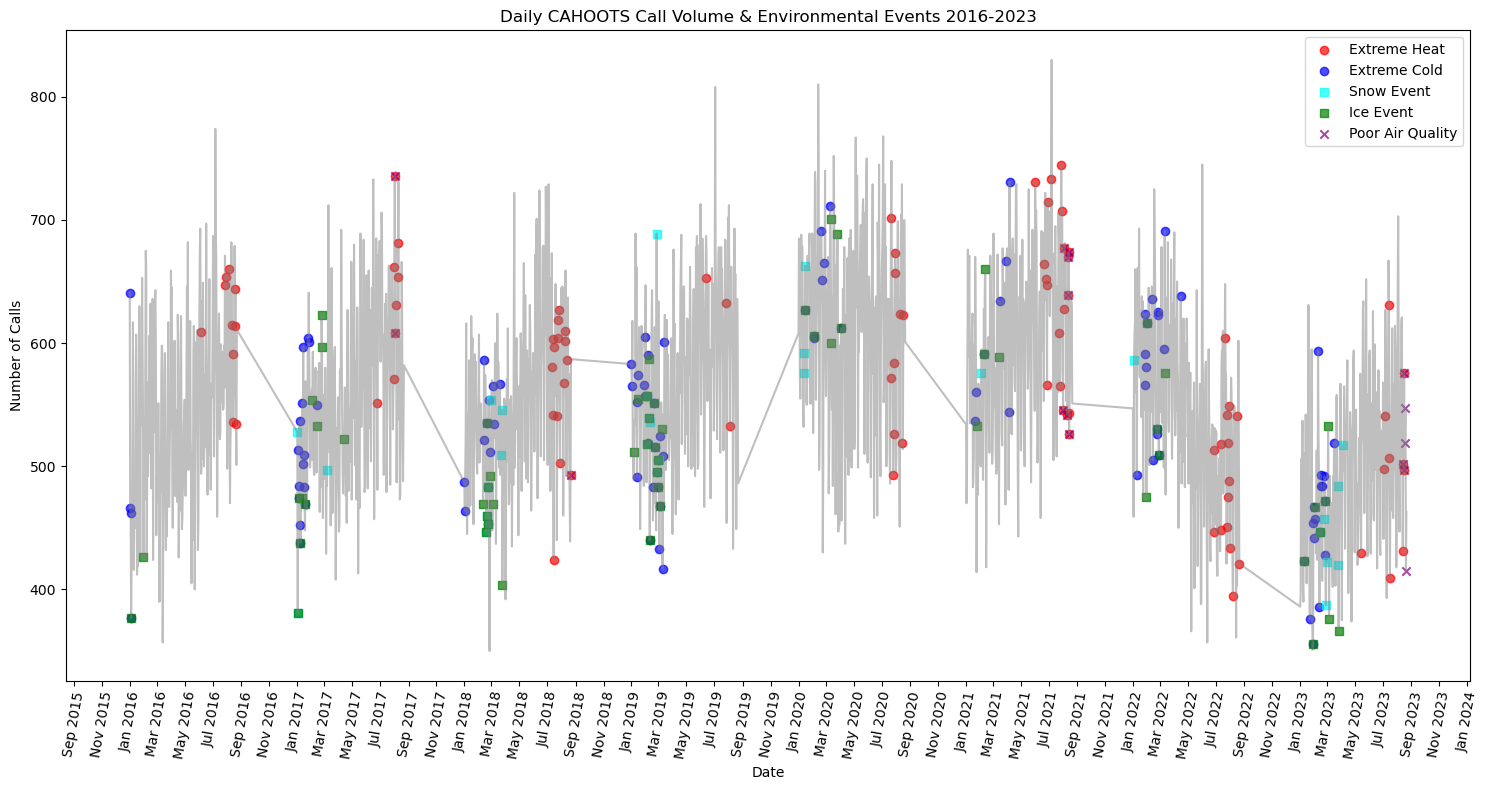

In [173]:
# TIME SERIES: daily calls, extreme events marked
plt.figure(figsize=(15, 8))
plt.plot(daily['Date'], daily['daily calls'], color='gray', alpha=0.5)

# markers for extreme events
plt.scatter(daily[daily['extreme heat'] == 1]['Date'], # heat
            daily[daily['extreme heat'] == 1]['daily calls'], 
            color='red', label='Extreme Heat', marker='o', alpha=0.7)

plt.scatter(daily[daily['extreme cold'] == 1]['Date'], # cold
            daily[daily['extreme cold'] == 1]['daily calls'], 
            color='blue', label='Extreme Cold', marker='o', alpha=0.7)

plt.scatter(daily[daily['snow event'] == 1]['Date'], # snowstorm
            daily[daily['snow event'] == 1]['daily calls'], 
            color='cyan', label='Snow Event', marker='s', alpha=0.7)

plt.scatter(daily[daily['ice event'] == 1]['Date'], # icestorm
            daily[daily['ice event'] == 1]['daily calls'], 
            color='green', label='Ice Event', marker='s', alpha=0.7)

plt.scatter(daily[daily['AQI hazard'] == 1]['Date'], # aqi
            daily[daily['AQI hazard'] == 1]['daily calls'], 
            color='purple', label='Poor Air Quality', marker='x', alpha=0.7)

# show month ticks on x axis: 3 month interval
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Format as 'Jan 2020'

plt.title('Daily CAHOOTS Call Volume & Environmental Events 2016-2023')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.xticks(rotation=80)
plt.legend()
plt.tight_layout()
plt.show()

## Findings:

- There is only data for Jan-August of each year, not accounting for fall.
- The overall volume of calls dropped significantly in 2022-2023.
- Poor air quality events often coincide with extreme heat events
- There are a **few specific events** that coincide with spikes in call volume, otherwise call volume ranges from low to high during extreme environmental events.
- 

## Comparing Call Volumes between normal and extreme conditions

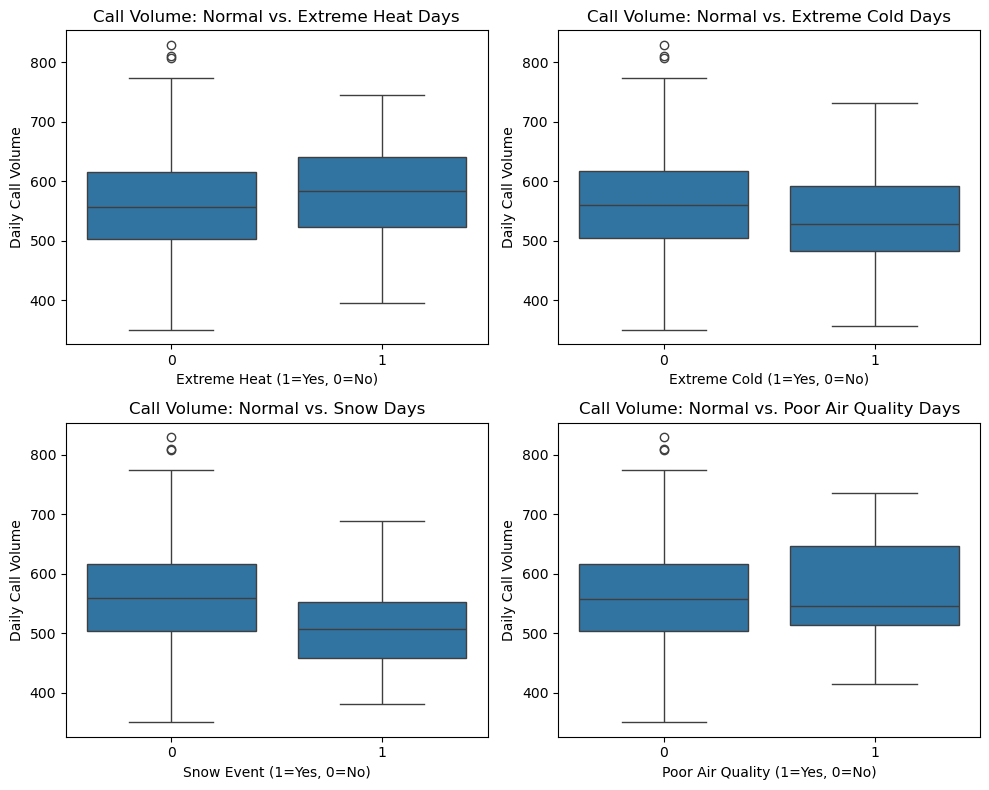


extreme heat comparison:
Normal days mean: 559.81 calls (n=1779)
Extreme days mean: 578.41 calls (n=91)
Difference: 18.59 calls
Percentage difference: 3.3%

extreme cold comparison:
Normal days mean: 562.25 calls (n=1766)
Extreme days mean: 534.75 calls (n=104)
Difference: -27.50 calls
Percentage difference: -4.9%

snow event comparison:
Normal days mean: 561.53 calls (n=1840)
Extreme days mean: 510.97 calls (n=30)
Difference: -50.56 calls
Percentage difference: -9.0%

AQI hazard comparison:
Normal days mean: 560.61 calls (n=1854)
Extreme days mean: 572.94 calls (n=16)
Difference: 12.32 calls
Percentage difference: 2.2%


In [176]:
# 4 plots comparing normal vs extreme conditions
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# extreme heat
sns.boxplot(x='extreme heat', y='daily calls', data=daily, ax=axes[0, 0])
axes[0, 0].set_title('Call Volume: Normal vs. Extreme Heat Days')
axes[0, 0].set_xlabel('Extreme Heat (1=Yes, 0=No)')
axes[0, 0].set_ylabel('Daily Call Volume')

# extreme cold
sns.boxplot(x='extreme cold', y='daily calls', data=daily, ax=axes[0, 1])
axes[0, 1].set_title('Call Volume: Normal vs. Extreme Cold Days')
axes[0, 1].set_xlabel('Extreme Cold (1=Yes, 0=No)')
axes[0, 1].set_ylabel('Daily Call Volume')

# snow events
sns.boxplot(x='snow event', y='daily calls', data=daily, ax=axes[1, 0])
axes[1, 0].set_title('Call Volume: Normal vs. Snow Days')
axes[1, 0].set_xlabel('Snow Event (1=Yes, 0=No)')
axes[1, 0].set_ylabel('Daily Call Volume')

# AQI hazard
sns.boxplot(x='AQI hazard', y='daily calls', data=daily, ax=axes[1, 1])
axes[1, 1].set_title('Call Volume: Normal vs. Poor Air Quality Days')
axes[1, 1].set_xlabel('Poor Air Quality (1=Yes, 0=No)')
axes[1, 1].set_ylabel('Daily Call Volume')

plt.tight_layout()
plt.show()

# print stats
for condition in ['extreme heat', 'extreme cold', 'snow event', 'AQI hazard']:
    normal = daily[daily[condition] == 0]['daily calls']
    extreme = daily[daily[condition] == 1]['daily calls']
    
    print(f"\n{condition} comparison:")
    print(f"Normal days mean: {normal.mean():.2f} calls (n={len(normal)})")
    print(f"Extreme days mean: {extreme.mean():.2f} calls (n={len(extreme)})")
    print(f"Difference: {extreme.mean() - normal.mean():.2f} calls")
    
    # % difference
    pct_diff = ((extreme.mean() - normal.mean()) / normal.mean()) * 100
    print(f"Percentage difference: {pct_diff:.1f}%")

## Correlations:

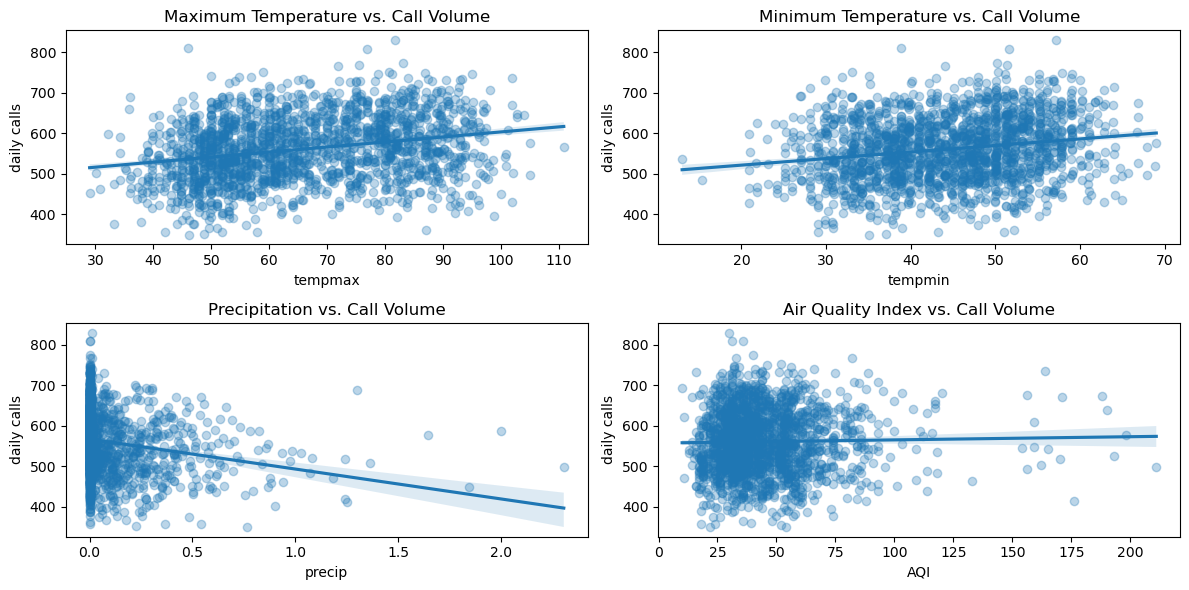

In [178]:
# correlations between CALL VOLUME and environmental variables
corr_vars = ['daily calls', 'tempmax', 'tempmin', 'precip', 'snow', 'AQI']
correlation_matrix = daily[corr_vars].corr()

# scatterplots
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# tempmax
sns.regplot(x='tempmax', y='daily calls', data=daily, ax=axes[0, 0], scatter_kws={'alpha':0.3})
axes[0, 0].set_title('Maximum Temperature vs. Call Volume')

# temp min
sns.regplot(x='tempmin', y='daily calls', data=daily, ax=axes[0, 1], scatter_kws={'alpha':0.3})
axes[0, 1].set_title('Minimum Temperature vs. Call Volume')

# precip
sns.regplot(x='precip', y='daily calls', data=daily, ax=axes[1, 0], scatter_kws={'alpha':0.3})
axes[1, 0].set_title('Precipitation vs. Call Volume')

# AQI
sns.regplot(x='AQI', y='daily calls', data=daily, ax=axes[1, 1], scatter_kws={'alpha':0.3})
axes[1, 1].set_title('Air Quality Index vs. Call Volume')

plt.tight_layout()
plt.show()

## Call Type Distribution analysis

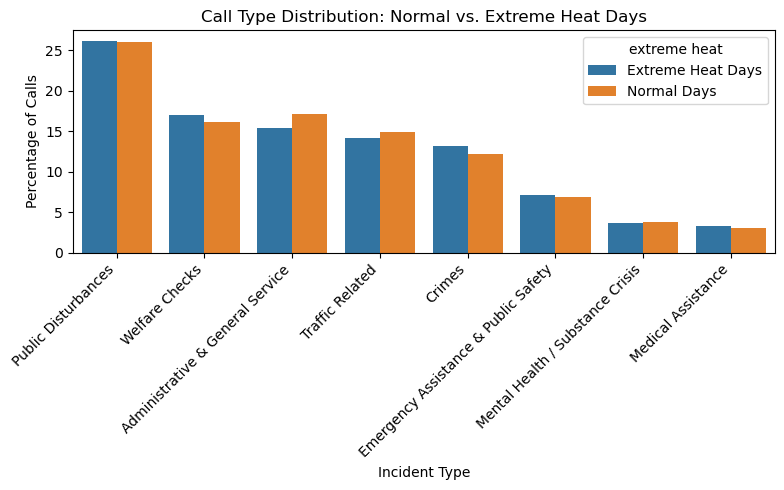


Call type distribution for Extreme Heat days:
  Crimes: 1.0% increase during Extreme Heat days
  Welfare Checks: 0.9% increase during Extreme Heat days
  Emergency Assistance & Public Safety: 0.3% increase during Extreme Heat days
  Medical Assistance: 0.2% increase during Extreme Heat days
  Public Disturbances: 0.2% increase during Extreme Heat days
  Mental Health / Substance Crisis: 0.1% decrease during Extreme Heat days
  Traffic Related: 0.7% decrease during Extreme Heat days
  Administrative & General Service: 1.8% decrease during Extreme Heat days


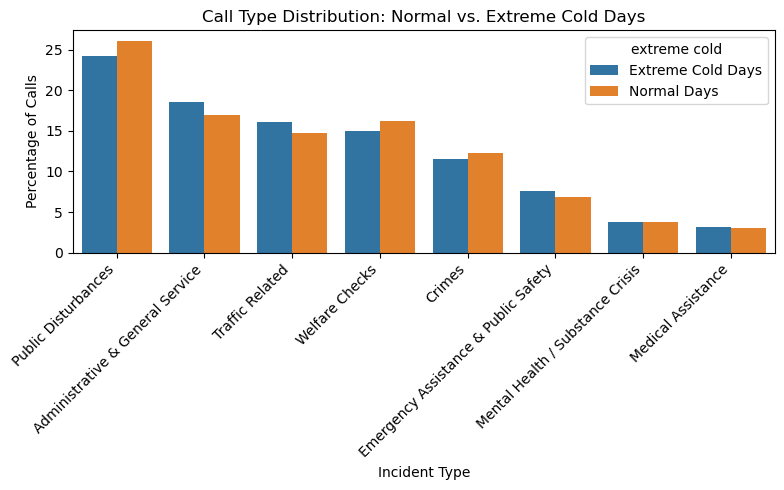


Call type distribution for Extreme Cold days:
  Administrative & General Service: 1.6% increase during Extreme Cold days
  Traffic Related: 1.3% increase during Extreme Cold days
  Emergency Assistance & Public Safety: 0.8% increase during Extreme Cold days
  Medical Assistance: 0.1% increase during Extreme Cold days
  Mental Health / Substance Crisis: 0.0% increase during Extreme Cold days
  Crimes: 0.8% decrease during Extreme Cold days
  Welfare Checks: 1.3% decrease during Extreme Cold days
  Public Disturbances: 1.8% decrease during Extreme Cold days


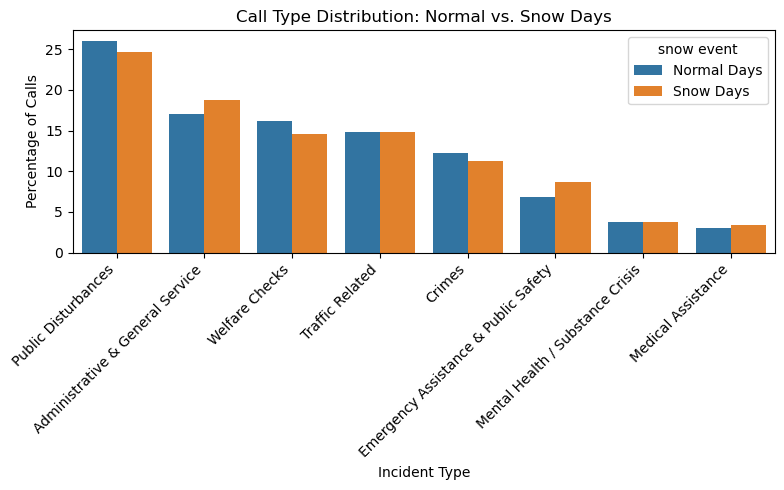


Call type distribution for Snow days:
  Emergency Assistance & Public Safety: 1.8% increase during Snow days
  Administrative & General Service: 1.7% increase during Snow days
  Medical Assistance: 0.4% increase during Snow days
  Mental Health / Substance Crisis: 0.1% increase during Snow days
  Traffic Related: 0.0% decrease during Snow days
  Crimes: 1.0% decrease during Snow days
  Public Disturbances: 1.3% decrease during Snow days
  Welfare Checks: 1.6% decrease during Snow days


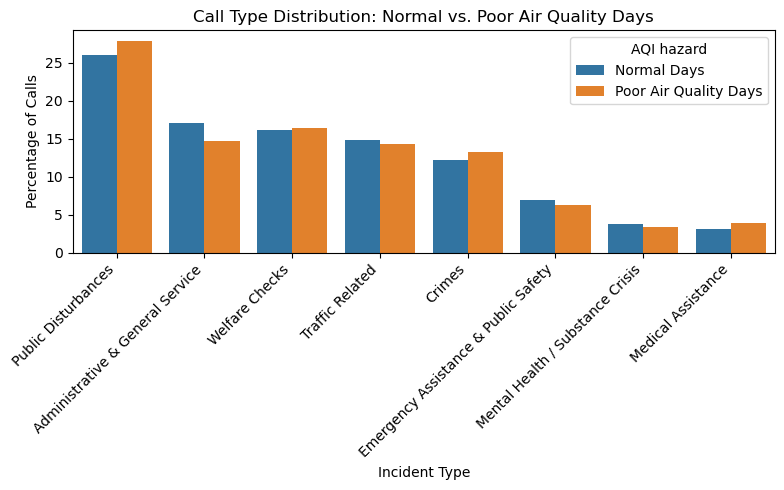


Call type distribution for Poor Air Quality days:
  Public Disturbances: 1.9% increase during Poor Air Quality days
  Crimes: 1.0% increase during Poor Air Quality days
  Medical Assistance: 0.8% increase during Poor Air Quality days
  Welfare Checks: 0.3% increase during Poor Air Quality days
  Mental Health / Substance Crisis: 0.4% decrease during Poor Air Quality days
  Traffic Related: 0.5% decrease during Poor Air Quality days
  Emergency Assistance & Public Safety: 0.6% decrease during Poor Air Quality days
  Administrative & General Service: 2.4% decrease during Poor Air Quality days


In [180]:
# plot call type distributions for different conditions
def plot_call_distribution(condition, condition_name):
    temp = clean_data[[condition, 'IncidentCategory']].copy()
    temp[condition] = temp[condition].map({0: 'Normal Days', 1: f'{condition_name} Days'})

    # Get percentage distributions
    dist = (
        temp.groupby(condition)['IncidentCategory'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index()
    )

    # Plot
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=dist,
        x='IncidentCategory', y='Percentage', hue=condition
    )
    plt.title(f'Call Type Distribution: Normal vs. {condition_name} Days')
    plt.xlabel('Incident Type')
    plt.ylabel('Percentage of Calls')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Print differences
    wide = dist.pivot(index='IncidentCategory', columns=condition, values='Percentage')
    wide['Diff'] = wide[f'{condition_name} Days'] - wide['Normal Days']
    print(f"\nCall type distribution for {condition_name} days:")
    for call_type, change in wide['Diff'].sort_values(ascending=False).items():
        direction = "increase" if change > 0 else "decrease"
        print(f"  {call_type}: {abs(change):.1f}% {direction} during {condition_name} days")

# Plot for each condition
plot_call_distribution('extreme heat', 'Extreme Heat')
plot_call_distribution('extreme cold', 'Extreme Cold')
plot_call_distribution('snow event', 'Snow')
plot_call_distribution('AQI hazard', 'Poor Air Quality')

## Findings:

- There aren't very strong differences between call volumes on days with 'extreme' weather vs. normal days.
- There are _small_ increases in specific call types with specific environmental hazards.

## Examining case studies of the most extreme environmental events:

In [183]:
# most extreme events in the data:
extreme_heat_events = daily.sort_values('tempmax', ascending=False).head(10)
extreme_cold_events = daily.sort_values('tempmin').head(10)
extreme_snow_events = daily.sort_values('snow', ascending=False).head(10)
extreme_aqi_events = daily.sort_values('AQI', ascending=False).head(10)

# Examine specific case studies
def analyze_specific_event(event_date, days_before=7, days_after=7, event_name="Event"):
    
    # before & after event timeperiods:
    before_start = event_date - pd.Timedelta(days=days_before)
    after_end = event_date + pd.Timedelta(days=days_after)
    
    # data from those specific timeperiods
    before_period = daily[(daily['Date'] >= before_start) & 
                           (daily['Date'] < event_date)]
    during_period = daily[daily['Date'] == event_date]
    after_period = daily[(daily['Date'] > event_date) & 
                          (daily['Date'] <= after_end)]
    
    # Calculate stats
    before_avg = before_period['daily calls'].mean()
    during_avg = during_period['daily calls'].mean()
    after_avg = after_period['daily calls'].mean()
    
    # Print
    print(f"\n{event_name} on {event_date.date()}:")
    print(f"  Environmental conditions: Max Temp: {during_period['tempmax'].iloc[0]:.1f}, " 
          f"Min Temp: {during_period['tempmin'].iloc[0]:.1f}, "
          f"Snow: {during_period['snow'].iloc[0]:.1f}, "
          f"AQI: {during_period['AQI'].iloc[0]:.1f}")
    print(f"  Before ({days_before} days): {before_avg:.1f} calls/day")
    print(f"  During event: {during_avg:.1f} calls")
    print(f"  After ({days_after} days): {after_avg:.1f} calls/day")
    print(f"  % Change from before to during: {((during_avg-before_avg)/before_avg)*100:.1f}%")
    
    # Return periods
    return before_period, during_period, after_period

# Analyze a few extreme events (one of each type)
heat_date = extreme_heat_events['Date'].iloc[0]
cold_date = extreme_cold_events['Date'].iloc[0] 
snow_date = extreme_snow_events['Date'].iloc[0]
aqi_date = extreme_aqi_events['Date'].iloc[0]

before_heat, during_heat, after_heat = analyze_specific_event(heat_date, event_name="Extreme Heat")
before_cold, during_cold, after_cold = analyze_specific_event(cold_date, event_name="Extreme Cold ")
before_snow, during_snow, after_snow = analyze_specific_event(snow_date, event_name="Snow Event")
before_aqi, during_aqi, after_aqi = analyze_specific_event(aqi_date, event_name="Poor Air Quality")


Extreme Heat on 2021-06-27:
  Environmental conditions: Max Temp: 110.8, Min Temp: 67.9, Snow: 0.0, AQI: 74.0
  Before (7 days): 647.9 calls/day
  During event: 566.0 calls
  After (7 days): 676.7 calls/day
  % Change from before to during: -12.6%

Extreme Cold  on 2017-01-06:
  Environmental conditions: Max Temp: 38.8, Min Temp: 13.0, Snow: 0.0, AQI: 84.0
  Before (7 days): 476.0 calls/day
  During event: 537.0 calls
  After (7 days): 482.7 calls/day
  % Change from before to during: 12.8%

Snow Event on 2019-02-25:
  Environmental conditions: Max Temp: 36.0, Min Temp: 33.0, Snow: 4.6, AQI: 56.0
  Before (7 days): 508.7 calls/day
  During event: 689.0 calls
  After (7 days): 511.4 calls/day
  % Change from before to during: 35.4%

Poor Air Quality on 2023-08-15:
  Environmental conditions: Max Temp: 104.9, Min Temp: 67.9, Snow: 0.0, AQI: 211.0
  Before (7 days): 539.9 calls/day
  During event: 497.0 calls
  After (7 days): 507.0 calls/day
  % Change from before to during: -7.9%


## Call Type breakdown _changes_ for each type of environmental event (before/during/after)

In [185]:
# Create a function to analyze changes in specific call types during extreme events
def analyze_call_type_changes(condition_col, condition_name):
    # Group by date and call type, count occurrences
    call_counts = clean_data.groupby(['Date', 'IncidentCategory']).size().reset_index(name='count')
    
    # Get normal vs. extreme day averages by call type
    normal_days = call_counts.merge(
        daily[daily[condition_col] == 0][['Date']], 
        on='Date'
    )
    
    extreme_days = call_counts.merge(
        daily[daily[condition_col] == 1][['Date']], 
        on='Date'
    )
    
    # Calculate average daily calls by type
    normal_avg = normal_days.groupby('IncidentCategory')['count'].mean()
    extreme_avg = extreme_days.groupby('IncidentCategory')['count'].mean()
    
    # Calculate difference and percentage change
    results = pd.DataFrame({
        'normal_avg': normal_avg,
        'extreme_avg': extreme_avg
    })
    
    results['diff'] = results['extreme_avg'] - results['normal_avg']
    results['pct_change'] = (results['diff'] / results['normal_avg']) * 100
    
    # Sort by absolute percentage change
    results = results.sort_values('pct_change', ascending=False)
    
    print(f"\nCall type changes during {condition_name} days:")
    for call_type, row in results.iterrows():
        direction = "increase" if row['diff'] > 0 else "decrease"
        print(f"  {call_type}: {abs(row['pct_change']):.1f}% {direction} " 
              f"({row['normal_avg']:.1f} to {row['extreme_avg']:.1f} calls/day)")
    
    return results

# Analyze changes for each condition
heat_changes = analyze_call_type_changes('extreme heat', 'Extreme Heat')
cold_changes = analyze_call_type_changes('extreme cold', 'Extreme Cold')
snow_changes = analyze_call_type_changes('snow event', 'Snow')
aqi_changes = analyze_call_type_changes('AQI hazard', 'Poor Air Quality')


Call type changes during Extreme Heat days:
  Crimes: 12.0% increase (68.2 to 76.4 calls/day)
  Medical Assistance: 10.6% increase (17.2 to 19.0 calls/day)
  Welfare Checks: 9.3% increase (90.1 to 98.5 calls/day)
  Emergency Assistance & Public Safety: 7.2% increase (38.4 to 41.2 calls/day)
  Public Disturbances: 4.1% increase (145.5 to 151.4 calls/day)
  Mental Health / Substance Crisis: 0.7% decrease (21.0 to 20.9 calls/day)
  Traffic Related: 1.7% decrease (83.4 to 82.0 calls/day)
  Administrative & General Service: 7.3% decrease (96.0 to 89.0 calls/day)

Call type changes during Extreme Cold days:
  Emergency Assistance & Public Safety: 6.1% increase (38.4 to 40.8 calls/day)
  Administrative & General Service: 4.3% increase (95.5 to 99.6 calls/day)
  Traffic Related: 3.6% increase (83.1 to 86.1 calls/day)
  Medical Assistance: 2.3% decrease (17.3 to 16.9 calls/day)
  Mental Health / Substance Crisis: 3.8% decrease (21.1 to 20.3 calls/day)
  Crimes: 10.9% decrease (69.0 to 61.5 cal

## Findings

- 

## Statistical Analyses Plan:

1. Permutation Tests for Overall Call Volume
   - Test for differences in mean daily calls between extreme vs. non-extreme days
   - Run separately for each environmental factor (heat, cold, snow, poor air quality)
   - Report effect sizes with 95% confidence intervals

2. Call type-specific permutation tests
   - Test for differences in specific call types (i.e. Emergency Assistance, Welfare Checks)
   - Identify which call categories show statistically significant changes during extreme events
   - Calculate percentage changes with CONFIDENCE INTERVALS

3. Threshold Sensitivity Analysis
   - Test how results change with different definitions of "extreme" events
   - Determine if findings are robust across different thresholds
   - Identify optimal thresholds where effects become meaningful

4. Case Studies of Most Extreme Events
   - Detailed before/during/after analysis of 3-5 most severe environmental events
   - Analyze both overall call volume (before/during/after) and categorical analysis (most common call types)
   - Compare patterns across different extreme event types

5. Interpretation & Practical Implications
   - statistical findings -> recommendations
   - Identify most common call types during each environmental extreme
   - Recommendations for resource allocation during future events